In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [39]:
index_data=pd.read_excel('國內A股主要股指的日收盤數據(2014-2018).xlsx',sheet_name="Sheet1",header=0,index_col=0)

In [40]:
index_data.head()

,上證綜指,深證成指,中證500,中證800
交易日,,,,
2014-01-02,2109.387,8114.388,3847.879,2586.018
2014-01-03,2083.136,8028.330,3816.316,2554.800
2014-01-06,2045.709,7818.458,3710.898,2493.397
2014-01-07,2047.317,7806.312,3733.662,2496.863
2014-01-08,2044.340,7802.143,3738.205,2500.878


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C34DD7B00>,
      dtype=object)

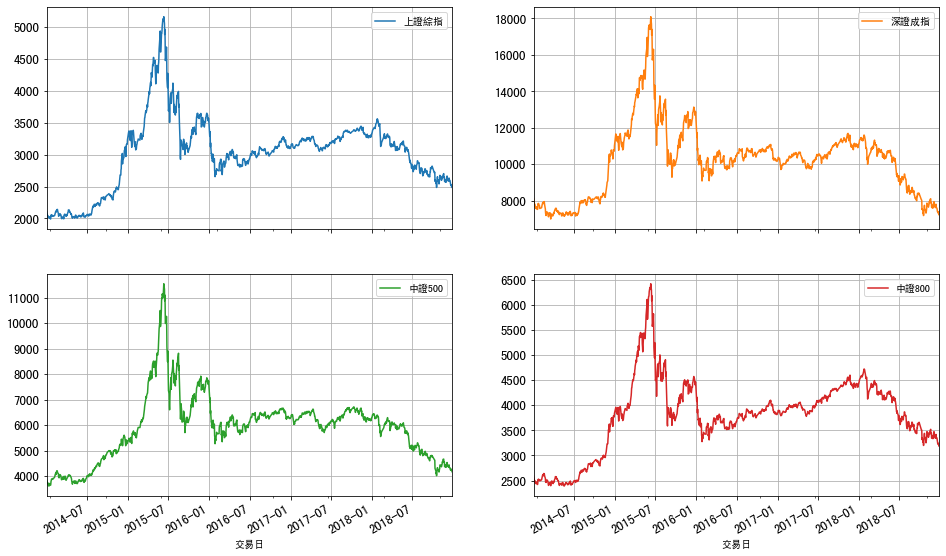

In [41]:
index_data.plot(subplots=True,layout=(2,2),figsize=(16,10),fontsize=13,grid=True)

### 股票投資組合的效率前緣

一般化投資組合預期收益率$E(R_{p})$為:

$$E(R_{p}) = E(\sum^{N}_{i=1}w_{i}R_{i})=\sum^{N}_{i=1}w_{i}E(R_{i})\\
=[w_{1},w_{2},\cdots,w_{N}][E(R_{1}),E(R_{2}),\cdots,E(R_{N})]^{T}$$

股票收益率$R_{it}$為:
$$R_{it} = \ln\frac{P_{it}}{P_{it-1}}$$

投資組合的波動率(風險)：

$$\sigma_{P} = \sqrt{\sum^{N}_{i=1}\sum^{N}_{i=1}w_{i}w_{j}Cov(R_{i},R_{j})}\\
\sqrt{\sum^{N}_{i=1}\sum^{N}_{i=1}\rho_{ij}w_{i}w_{j}\sigma_{i}\sigma_{j}}$$

$\therefore$
$$\rho_{ij}=\frac{Cov(R_{i},R_{j})}{\sigma_{i}\sigma_{j}}$$
$i=j, Cov(R_{i},R_{j})=\sigma^{2}_{i}=\sigma^{2}_{j}, \rho_{ij}=1$;

$i\neq j,Cov(R_{i},R_{j})=Cov(R_{j},R_{i}), \rho_{ij}=\rho_{ji}$

若以矩陣型態計算，
$$\scriptstyle\textbf{w} = [w_{1},w_{2},\cdots,w_{N}]\quad 
\scriptstyle\sum =  \begin{pmatrix}
  \sigma^{2}_{1} & \sigma_{12} & \cdots & \sigma_{1N} \\
  \sigma_{21} & \sigma^{2}_{2} & \cdots & \sigma_{2N}  \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{N1} & \sigma_{N2} & \cdots & \sigma^{2}_{N} 
 \end{pmatrix} \quad \sigma_{ij}=Cov(R_{i},R_{j})$$
 
 投資組合收益波動率可寫成:
 $$\sigma_{P} = \sqrt{\textbf{w}\scriptstyle\sum \textbf{w}^{\textbf{T}}}$$

In [64]:
x=np.random.random(5)
weights=x/np.sum(x)
print(weights)

[0.02628127 0.29161968 0.35994445 0.278886   0.04326859]


In [65]:
round(sum(weights),2)

1.0

In [66]:
data=pd.read_excel('構建投資組合的五種股票數據(2016-2018).xlsx',sheet_name="Sheet1",header=0,index_col=0)
data.head()

,上海機場,寶鋼股份,海通證券,工商銀行,中國石油
日期,,,,,
2016-01-04,28.27,5.23,14.28,4.45,8.13
2016-01-05,28.76,5.43,14.33,4.47,8.07
2016-01-06,29.50,5.97,14.58,4.51,8.31
2016-01-07,27.99,5.38,13.23,4.43,7.83
2016-01-08,28.03,5.92,13.51,4.46,7.99


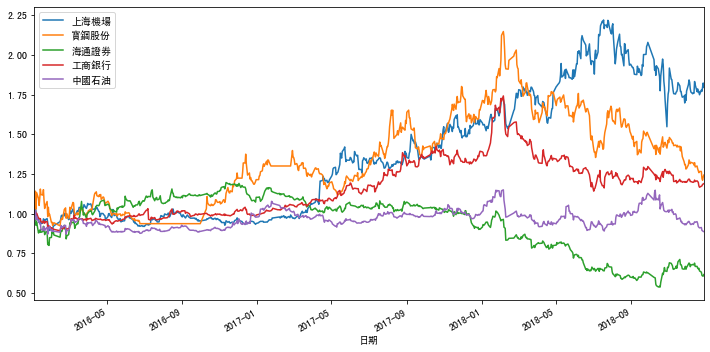

In [67]:
(data/data.iloc[0]).plot(figsize=(12,6))

In [68]:
R=np.log(data/data.shift(1))
R=R.dropna()
R.describe()

,上海機場,寶鋼股份,海通證券,工商銀行,中國石油
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.000802,0.000298,-0.000663,0.000237,-0.000165
std,0.019078,0.021775,0.016945,0.012614,0.012901
min,-0.105361,-0.104059,-0.098549,-0.067593,-0.082521
25%,-0.008854,-0.009260,-0.007118,-0.004662,-0.005274
50%,0.000372,0.000000,-0.000648,0.000000,0.000000
75%,0.008488,0.010305,0.006625,0.006316,0.005203
max,0.088763,0.095648,0.095198,0.059223,0.070761


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C3686ADA0>,
      dtype=object)

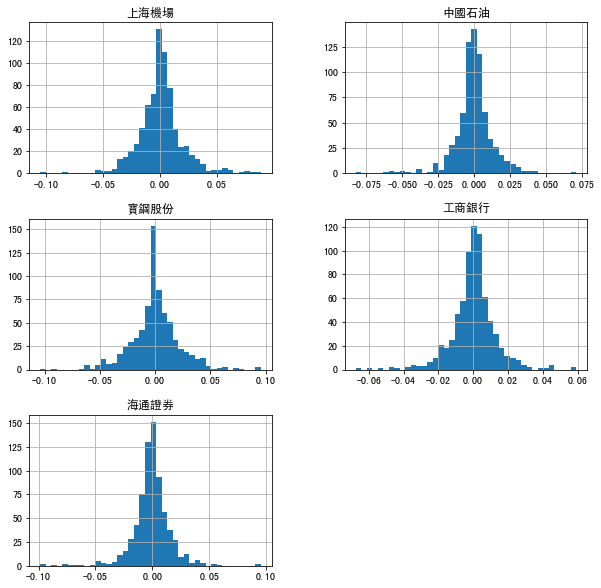

In [69]:
R.hist(bins=40,figsize=(10,10))

In [70]:
R_mean=R.mean()*252
print(R_mean)

上海機場    0.202051
寶鋼股份    0.075045
海通證券   -0.167117
工商銀行    0.059691
中國石油   -0.041456
dtype: float64


In [71]:
R_cov=R.cov()*252
print(R_cov)

          上海機場      寶鋼股份      海通證券      工商銀行      中國石油
上海機場  0.091724  0.022705  0.022375  0.014478  0.017292
寶鋼股份  0.022705  0.119489  0.042816  0.023992  0.030719
海通證券  0.022375  0.042816  0.072361  0.021051  0.028913
工商銀行  0.014478  0.023992  0.021051  0.040094  0.016621
中國石油  0.017292  0.030719  0.028913  0.016621  0.041939


In [72]:
R_corr=R.corr()
print(R.corr)

<bound method DataFrame.corr of                 上海機場      寶鋼股份      海通證券      工商銀行      中國石油
日期                                                          
2016-01-05  0.017184  0.037528  0.003495  0.004484 -0.007407
2016-01-06  0.025405  0.094808  0.017295  0.008909  0.029306
2016-01-07 -0.052543 -0.104059 -0.097164 -0.017898 -0.059497
2016-01-08  0.001428  0.095648  0.020943  0.006749  0.020228
2016-01-11 -0.033373 -0.032621 -0.074507 -0.031893 -0.036970
2016-01-12 -0.010755 -0.040967  0.013466  0.000000  0.007762
2016-01-13 -0.001119  0.040967 -0.009486 -0.004640 -0.019519
2016-01-14  0.002982  0.052688  0.021219  0.002323  0.002625
2016-01-15 -0.014243 -0.030254 -0.020425 -0.018736 -0.038749
2016-01-18  0.003768 -0.003419  0.005540 -0.009501 -0.009583
2016-01-19  0.027816  0.030356  0.036424  0.014218  0.020423
2016-01-20 -0.003664 -0.061663 -0.013022 -0.007084  0.005376
2016-01-21 -0.015912 -0.047025 -0.045749 -0.009524 -0.027176
2016-01-22  0.014074  0.016529  0.016807  0.009524  0

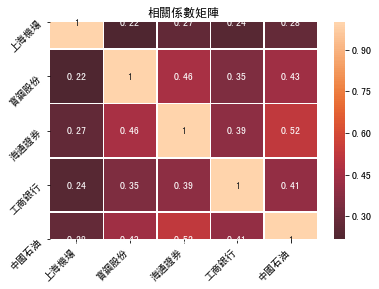

In [73]:
ax =  seaborn.heatmap(R_corr, annot=True, center=0, linewidths=.5)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=45, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.title('相關係數矩陣')
plt.show()

In [74]:
R_vol=R.std()*np.sqrt(252)
print(R_vol)

上海機場    0.302861
寶鋼股份    0.345671
海通證券    0.269000
工商銀行    0.200236
中國石油    0.204791
dtype: float64


#### 　隨機權重計算投資組合預期收益率6.12%/年,收益波動率19.91%/年

In [75]:
R_port=np.sum(weights*R_mean)
print('投資組合的預期收益率', round(R_port, 4))

投資組合的預期收益率 -0.0181


In [76]:
vol_port=np.sqrt(np.dot(weights, np.dot(R_cov,weights.T)))
print('投資組合收益波動率',round(vol_port,4))

投資組合收益波動率 0.2074


### 投資組合的有效前沿

$$\min_{w_{i}}\sigma_{P} = \min_{w_{i}}\sqrt{\sum^{N}_{i=1}\sum^{N}_{i=1}w_{i}w_{j}Cov(R_{i},R_{j})}$$

限制條件是

$$\sum^{N}_{i=1}w_{i} = 1\\
w_{i}>0 \quad \mbox{不允許融券}\\
E(R_{P}) = E(\sum^{N}_{i=1}w_{i}R_{i}) = \mbox{給定常數}$$

In [78]:
Rp_list=[]
Vp_list=[]
for i in np.arange(1000):
    x=np.random.random(5)
    weights=x/sum(x)
    Rp_list.append(np.sum(weights*R_mean))
    Vp_list.append(np.sqrt(np.dot(weights,np.dot(R_cov,weights.T))))

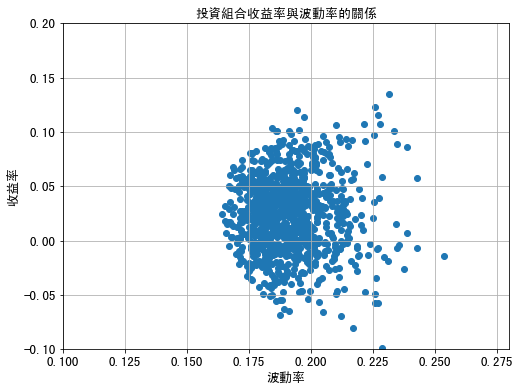

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(Vp_list, Rp_list)
plt.xlabel('波動率',fontsize=13)
plt.ylabel('收益率',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.1,0.28)
plt.ylim(-0.1,0.2)
plt.title('投資組合收益率與波動率的關係',fontsize=13)
plt.grid('True')
plt.show()

In [81]:
import scipy.optimize as sco
def f(w):
    w=np.array(w)
    Rp_opt=np.sum(w*R_mean)
    Vp_opt=np.sqrt(np.dot(w,np.dot(R_cov,w.T)))
    return np.array([Rp_opt, Vp_opt])

In [82]:
def Vmin_f(w):
    return f(w)[1]

In [83]:
cons=({'type':'eq','fun':lambda x: np.sum(x)-1},{'type':'eq', 'fun':lambda x: f(x)[0]-0.1})
bnds = tuple((0,1) for x in range(len(R_mean)))

In [84]:
len(R_mean)*[1.0/len(R_mean),]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [85]:
result = sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method='SLSQP', bounds=bnds, constraints = cons)
print('投資組合預期收益率 10%時上海機場的權重',round(result['x'][0],4))
print('投資組合預期收益率 10%時寶鋼股份的權重',round(result['x'][1],4))
print('投資組合預期收益率 10%時海通證券的權重',round(result['x'][2],4))
print('投資組合預期收益率 10%時工商銀行的權重',round(result['x'][3],4))
print('投資組合預期收益率 10%時中國石油的權重',round(result['x'][4],4))

投資組合預期收益率 10%時上海機場的權重 0.3344
投資組合預期收益率 10%時寶鋼股份的權重 0.0614
投資組合預期收益率 10%時海通證券的權重 0.0
投資組合預期收益率 10%時工商銀行的權重 0.5227
投資組合預期收益率 10%時中國石油的權重 0.0815


In [86]:
cons_vmin=({'type':'eq','fun':lambda x: np.sum(x)-1})
result_vmin=sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds, constraints=cons_vmin)
Rp_vmin=np.sum(R_mean*result_vmin['x'])
Vp_vmin=result_vmin['fun']
print('波動率在可行集是全局最小值時的投資組合預期收益率',round(Rp_vmin,4))
print('在可行集是全局最小的波動率',round(Vp_vmin,4))

波動率在可行集是全局最小值時的投資組合預期收益率 0.0306
在可行集是全局最小的波動率 0.1636


In [87]:
Rp_target=np.linspace(Rp_vmin, 0.25,100)
Vp_target=[]
for r in Rp_target:
    cons_new=({'type':'eq','fun':lambda x:np.sum(x)-1},{'type':'eq','fun':lambda x: f(x)[0]-r})
    result_new=sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons_new)
    Vp_target.append(result_new['fun'])

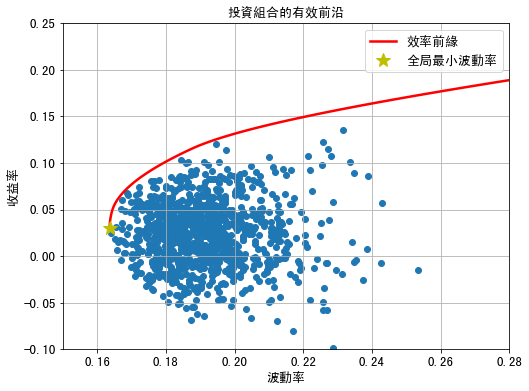

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target,Rp_target,'r-',label='效率前緣',lw=2.5)
plt.plot(Vp_vmin, Rp_vmin, 'y*', label='全局最小波動率', markersize=14)
plt.xlabel('波動率',fontsize=13)
plt.ylabel('收益率',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.15,0.28)
plt.ylim(-0.1,0.25)
plt.title('投資組合的有效前沿',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

### 資本市場線

$$E(R_{P}) = R_{F} + \textstyle[\frac{E(R_{M})-R_{F}}{\sigma_{M}}]\sigma_{P}$$

$R_{F}$表示無風險利率，$E(R_{M})$與$\sigma_{M}$為資本市場線與效率前沿的切點所對應之投資組合預期收益率與波動率。

$\frac{E(R_{M})-R_{F}}{\sigma_{M}}$為市場資本線的斜率，該斜率為Sharpe Ratio

$$\max_{w_{i}}\frac{E(R_{P})-R_{F}}{\sigma_{P}}\\
\mbox{subject to} \sum^{N}_{i=1}w_{i} = 1\\
w_{i}>0 $$

In [92]:
def F(w):
    Rf=0.02
    w=np.array(w)
    Rp_opt=np.sum(w*R_mean)
    Vp_opt=np.sqrt(np.dot(w,np.dot(R_cov,w.T)))
    SR=(Rp_opt-Rf)/Vp_opt
    return np.array([Rp_opt,Vp_opt,SR])

In [93]:
def SRmin_F(w):
    return -F(w)[2]

In [95]:
cons_SR=({'type':'eq','fun':lambda x: np.sum(x)-1})
result_SR=sco.minimize(SRmin_F, len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds, constraints=cons_SR)

In [97]:
Rf=0.02
slope=-result_SR['fun']
Rm=np.sum(R_mean*result_SR['x'])
Vm=(Rm-Rf)/slope
print('市場組合的預期收益率',round(Rm,4))
print('市場組合的波動率',round(Vm,4))

市場組合的預期收益率 0.1827
市場組合的波動率 0.2695


In [98]:
Rp_cml=np.linspace(0.02,0.25)
Vp_cml=(Rp_cml-Rf)/slope

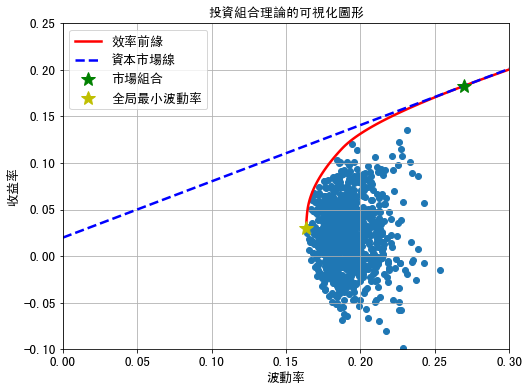

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target,Rp_target,'r-',label='效率前緣',lw=2.5)
plt.plot(Vp_cml, Rp_cml, 'b--', label='資本市場線', lw=2.5)
plt.plot(Vm, Rm, 'g*', label='市場組合', markersize=14)
plt.plot(Vp_vmin, Rp_vmin, 'y*', label='全局最小波動率', markersize=14)
plt.xlabel('波動率',fontsize=13)
plt.ylabel('收益率',fontsize=13,rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.0,0.3)
plt.ylim(-0.1,0.25)
plt.title('投資組合理論的可視化圖形',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

### 資本資產定價模型